
# **Project: Prediction of Demand for shared bikes**
### Multiple Linear Regression
---
**Document Information:**
- **Authors:** Irshad Shaikh
- **Creation Date:** May 27th, 2024
- **Last Update Date:** May 28th, 2024
- **Last Updated by:** [Update by Name/Initials]

**Script Version:** 1.0<br>
**Package Versions:**
- pandas : 2.2.2
- numpy : 1.26.4
- seaborn : 0.13.2
- matplotlib : 3.9.0
- sklearn : 1.5.0
- statsmodels : 0.14.2

---

In [1]:
# Importing required packages 


import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings as ws
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#import plotly.express as px
ws.filterwarnings('ignore')

### **EDA**

In [2]:
# Reading Data file
df=pd.read_csv('day.csv')

In [3]:
# Checking columns for null values 
#   As per below there are not empty columns

print(100*df.isnull().mean())

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [4]:
# Checking for empty rows
# As per above there are no null values in data hence we can conclude that there are no empty rows
print(100*df.isnull().mean(axis=1).unique())

[0.]


In [5]:
# Checking sample rows for getting sense of the Data
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
151,152,01-06-2018,2,0,6,0,3,1,2,31.330847,36.04835,67.7083,13.875164,513,3461,3974
364,365,31-12-2018,1,0,12,0,6,0,1,16.810000,20.70605,61.5833,14.750318,665,1820,2485
359,360,26-12-2018,1,0,12,1,1,0,1,13.191299,15.77675,50.6957,16.044155,430,887,1317
488,489,04-05-2019,2,1,5,0,5,1,1,25.727500,29.54585,73.5417,10.916846,1069,5227,6296
394,395,30-01-2019,1,1,1,0,1,1,1,11.035847,13.13125,40.0833,14.458064,126,3498,3624


In [6]:
# Checking columns and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# After checking info by using df.info() we can observe that dteday is type of object we need to convert its type to date
df['dteday'] = df['dteday'].str.strip()
df['dteday'] = pd.to_datetime(df['dteday'],dayfirst=True, format='%d-%m-%Y')


In [8]:
# Checking unique values for workingday column
df['workingday'].unique()

array([0, 1], dtype=int64)

In [9]:
# Checking if there are any duplicates 
# After executing below we can see that there are no duplicates 
print('Total Records shape: ', df.shape)
print('Shape after removing duplicates: ',df.drop_duplicates().shape)

Total Records shape:  (730, 16)
Shape after removing duplicates:  (730, 16)


In [10]:
# Display sample data
df.sample(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
622,623,2019-09-15,3,1,9,0,6,0,1,24.941653,29.29335,50.1667,16.583907,3160,5554,8714
309,310,2018-11-06,4,0,11,0,0,0,1,14.281653,18.11790,73.4583,6.167631,952,2697,3649
550,551,2019-07-05,3,1,7,0,4,1,1,33.927500,38.06835,45.7917,12.999943,1405,4836,6241


In [11]:
# Above data looks good hence I am creating one more data frame and storing in it if in case required
df1=df.copy()

In [12]:
# Segrigating measure and dimensions for analysis
ms_col=['temp','atemp','hum','windspeed','casual','registered','cnt']
dim_col=['season','yr','mnth','holiday','weekday','workingday','weathersit']
oth_col=['dtday','instant']

In [13]:
# Nameing the codes values to more descriptive values 
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth']=df['mnth'].map({1:'jan', 2:'feb', 3:'march', 4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df['weekday']=df['weekday'].map({0:'tue',1:'wed',2:'thu',3:'fri',4:'sat',5:'sun',6:'mon'})
df['weathersit']=df['weathersit'].map({1:'Clear',2:'Cloudy',3:'Snowy',4:'Rainy'})

------------------------------------ temp -----------------------------------------
temp


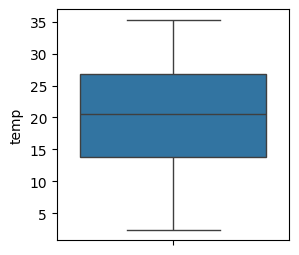

------------------------------------ atemp -----------------------------------------
atemp


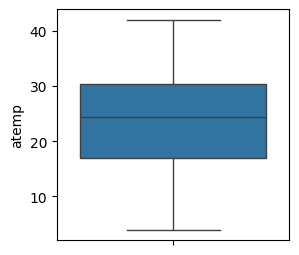

------------------------------------ hum -----------------------------------------
hum


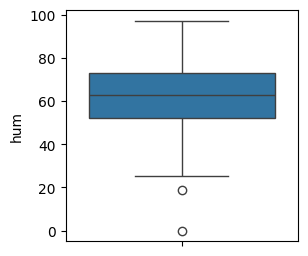

------------------------------------ windspeed -----------------------------------------
windspeed


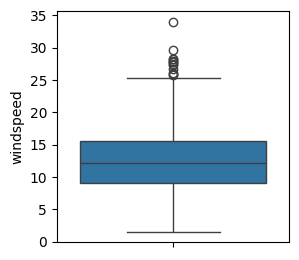

------------------------------------ casual -----------------------------------------
casual


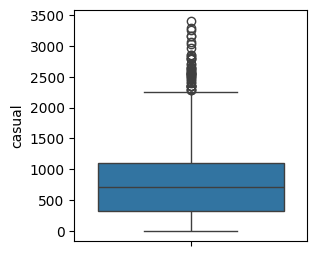

------------------------------------ registered -----------------------------------------
registered


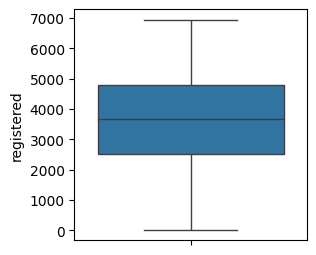

------------------------------------ cnt -----------------------------------------
cnt


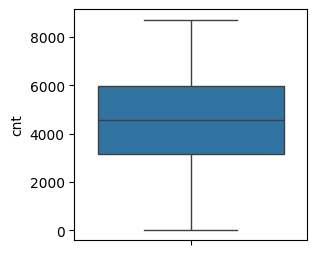

In [14]:
# Displaying box plot for measures
# As per the below box plot there are few outliers in windspeed, casual and hum but the reset of the data look good without any outliers
cnt=1
for x in ms_col:
    plt.figure(figsize=(3,3))
    print('------------------------------------',x,'-----------------------------------------')
    print(x)
    sns.boxplot(df[x])
    cnt=cnt+1
    plt.show()

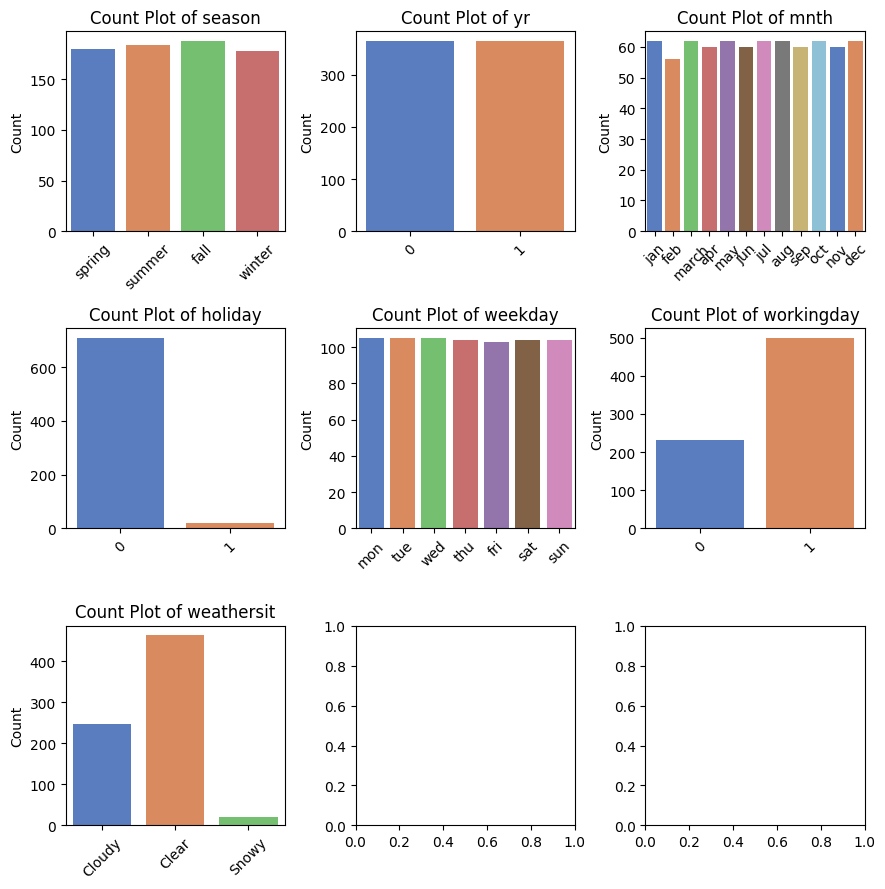

In [15]:
# Graph for season shows that there is slight count increase in fall season
# Graph for holiday, workingday shows that bike uses increased on work day 
dim_col=['season','yr','mnth','holiday','weekday','workingday','weathersit']
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()
cp=sns.color_palette("muted")

# Generate count plots for each column in dim_col
for i, col in enumerate(dim_col):
    sns.countplot(data=df[dim_col], x=col, ax=axes[i], palette=cp)
    axes[i].set_title(f'Count Plot of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

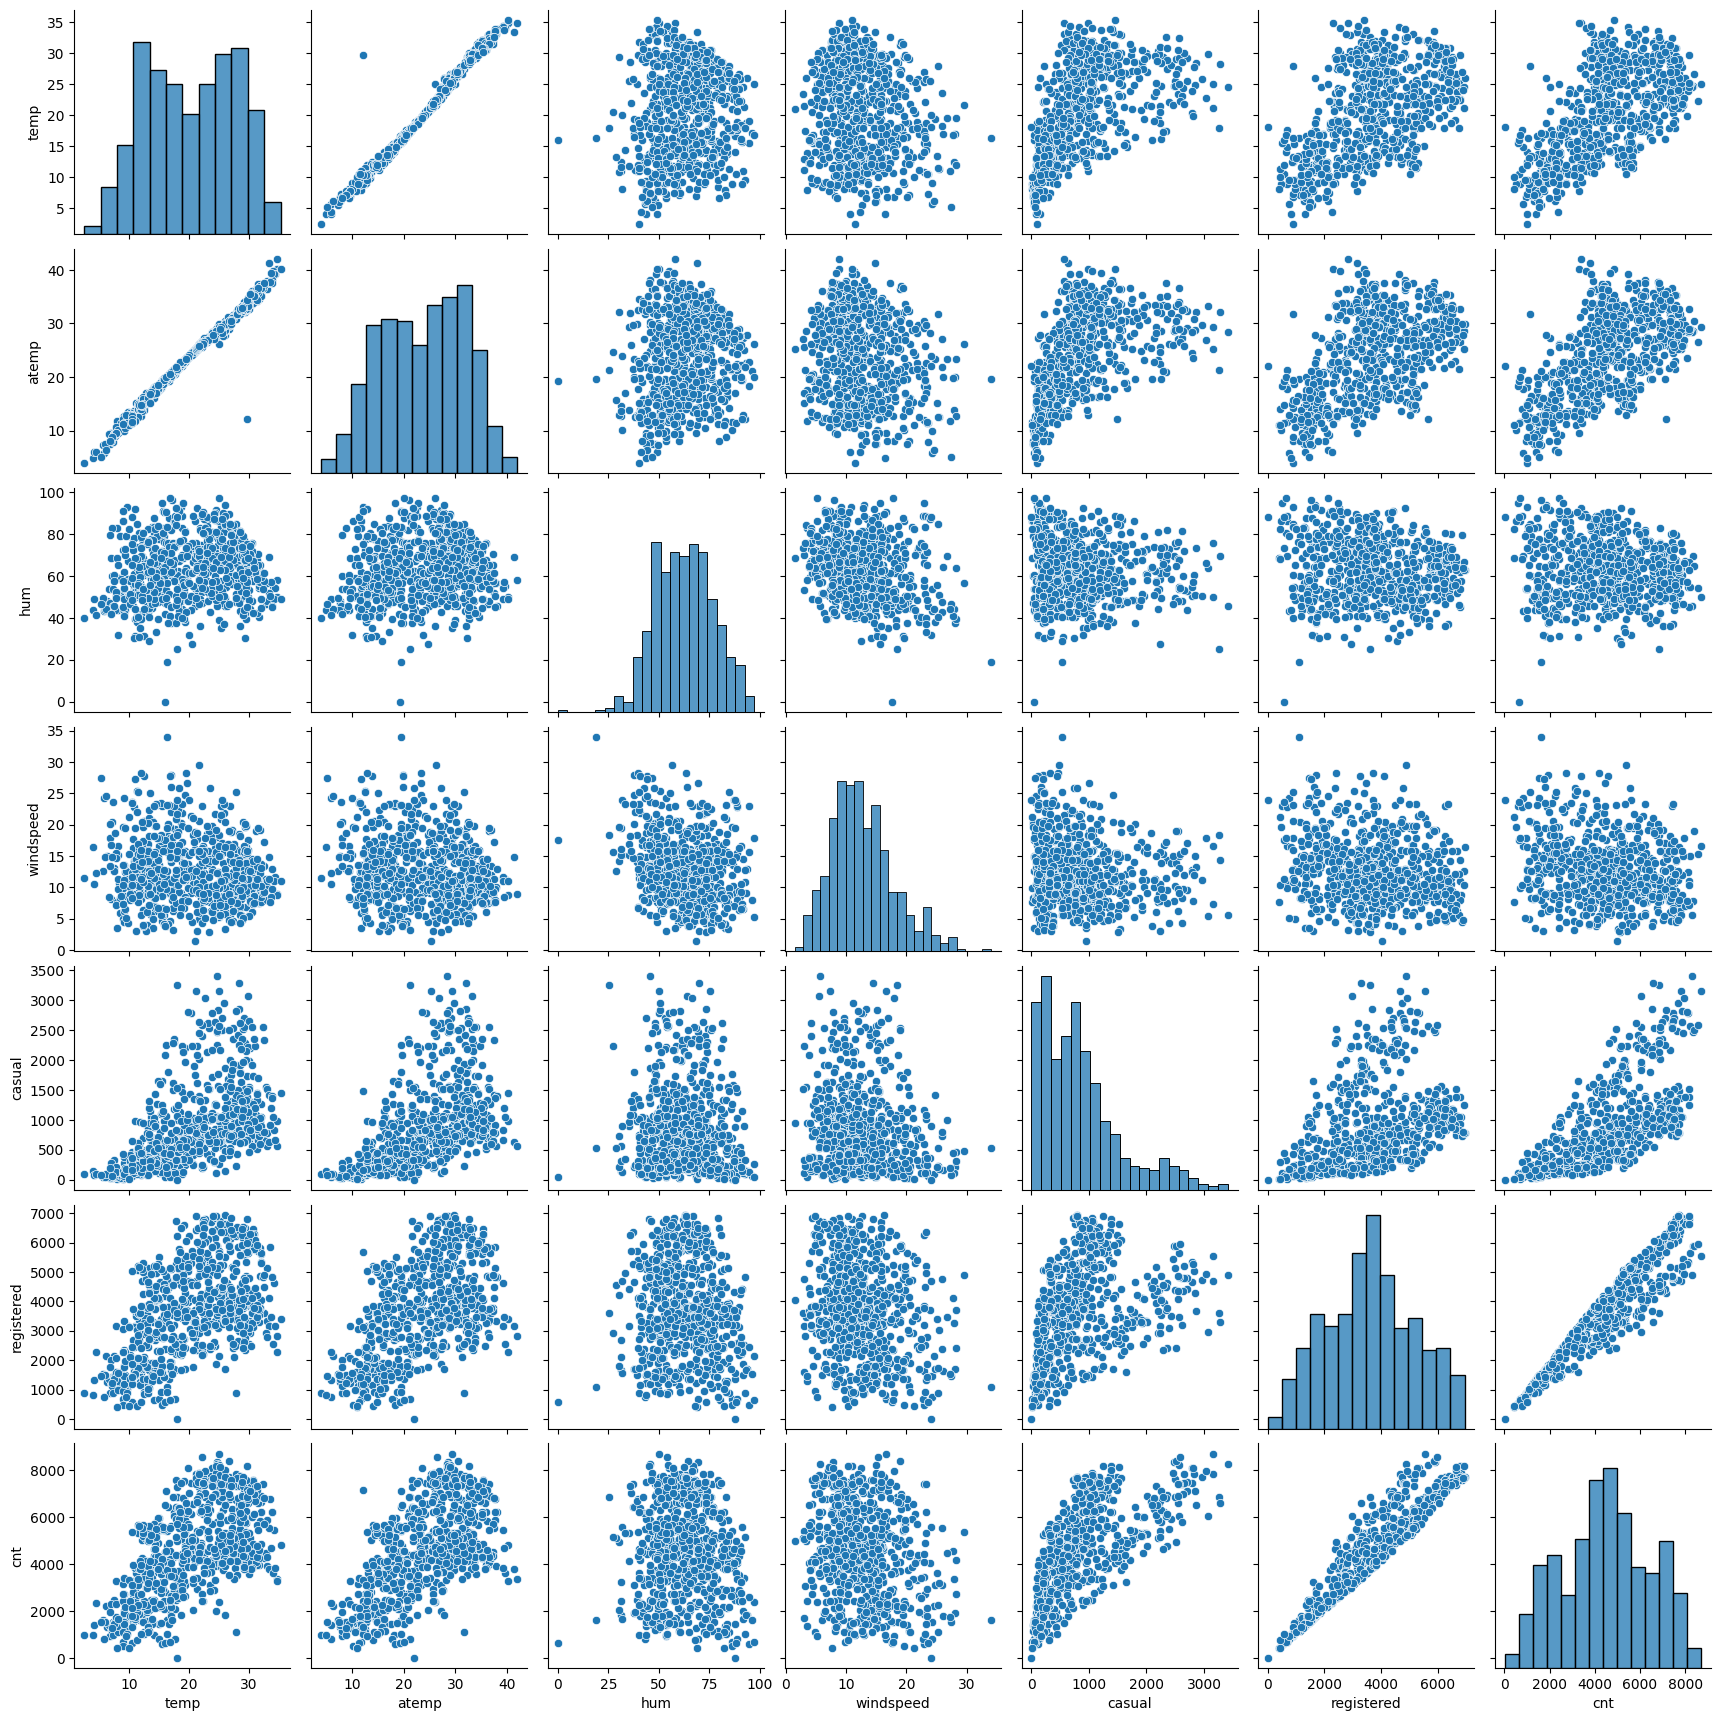

In [16]:
# Seperating Measurs and Dimensions 
# As per below pairplot we can see there is a linear pattern between cnt and registered, cnt and casual 
# Hence we can use Linear regression model on this data 
sns.pairplot(df[ms_col])   


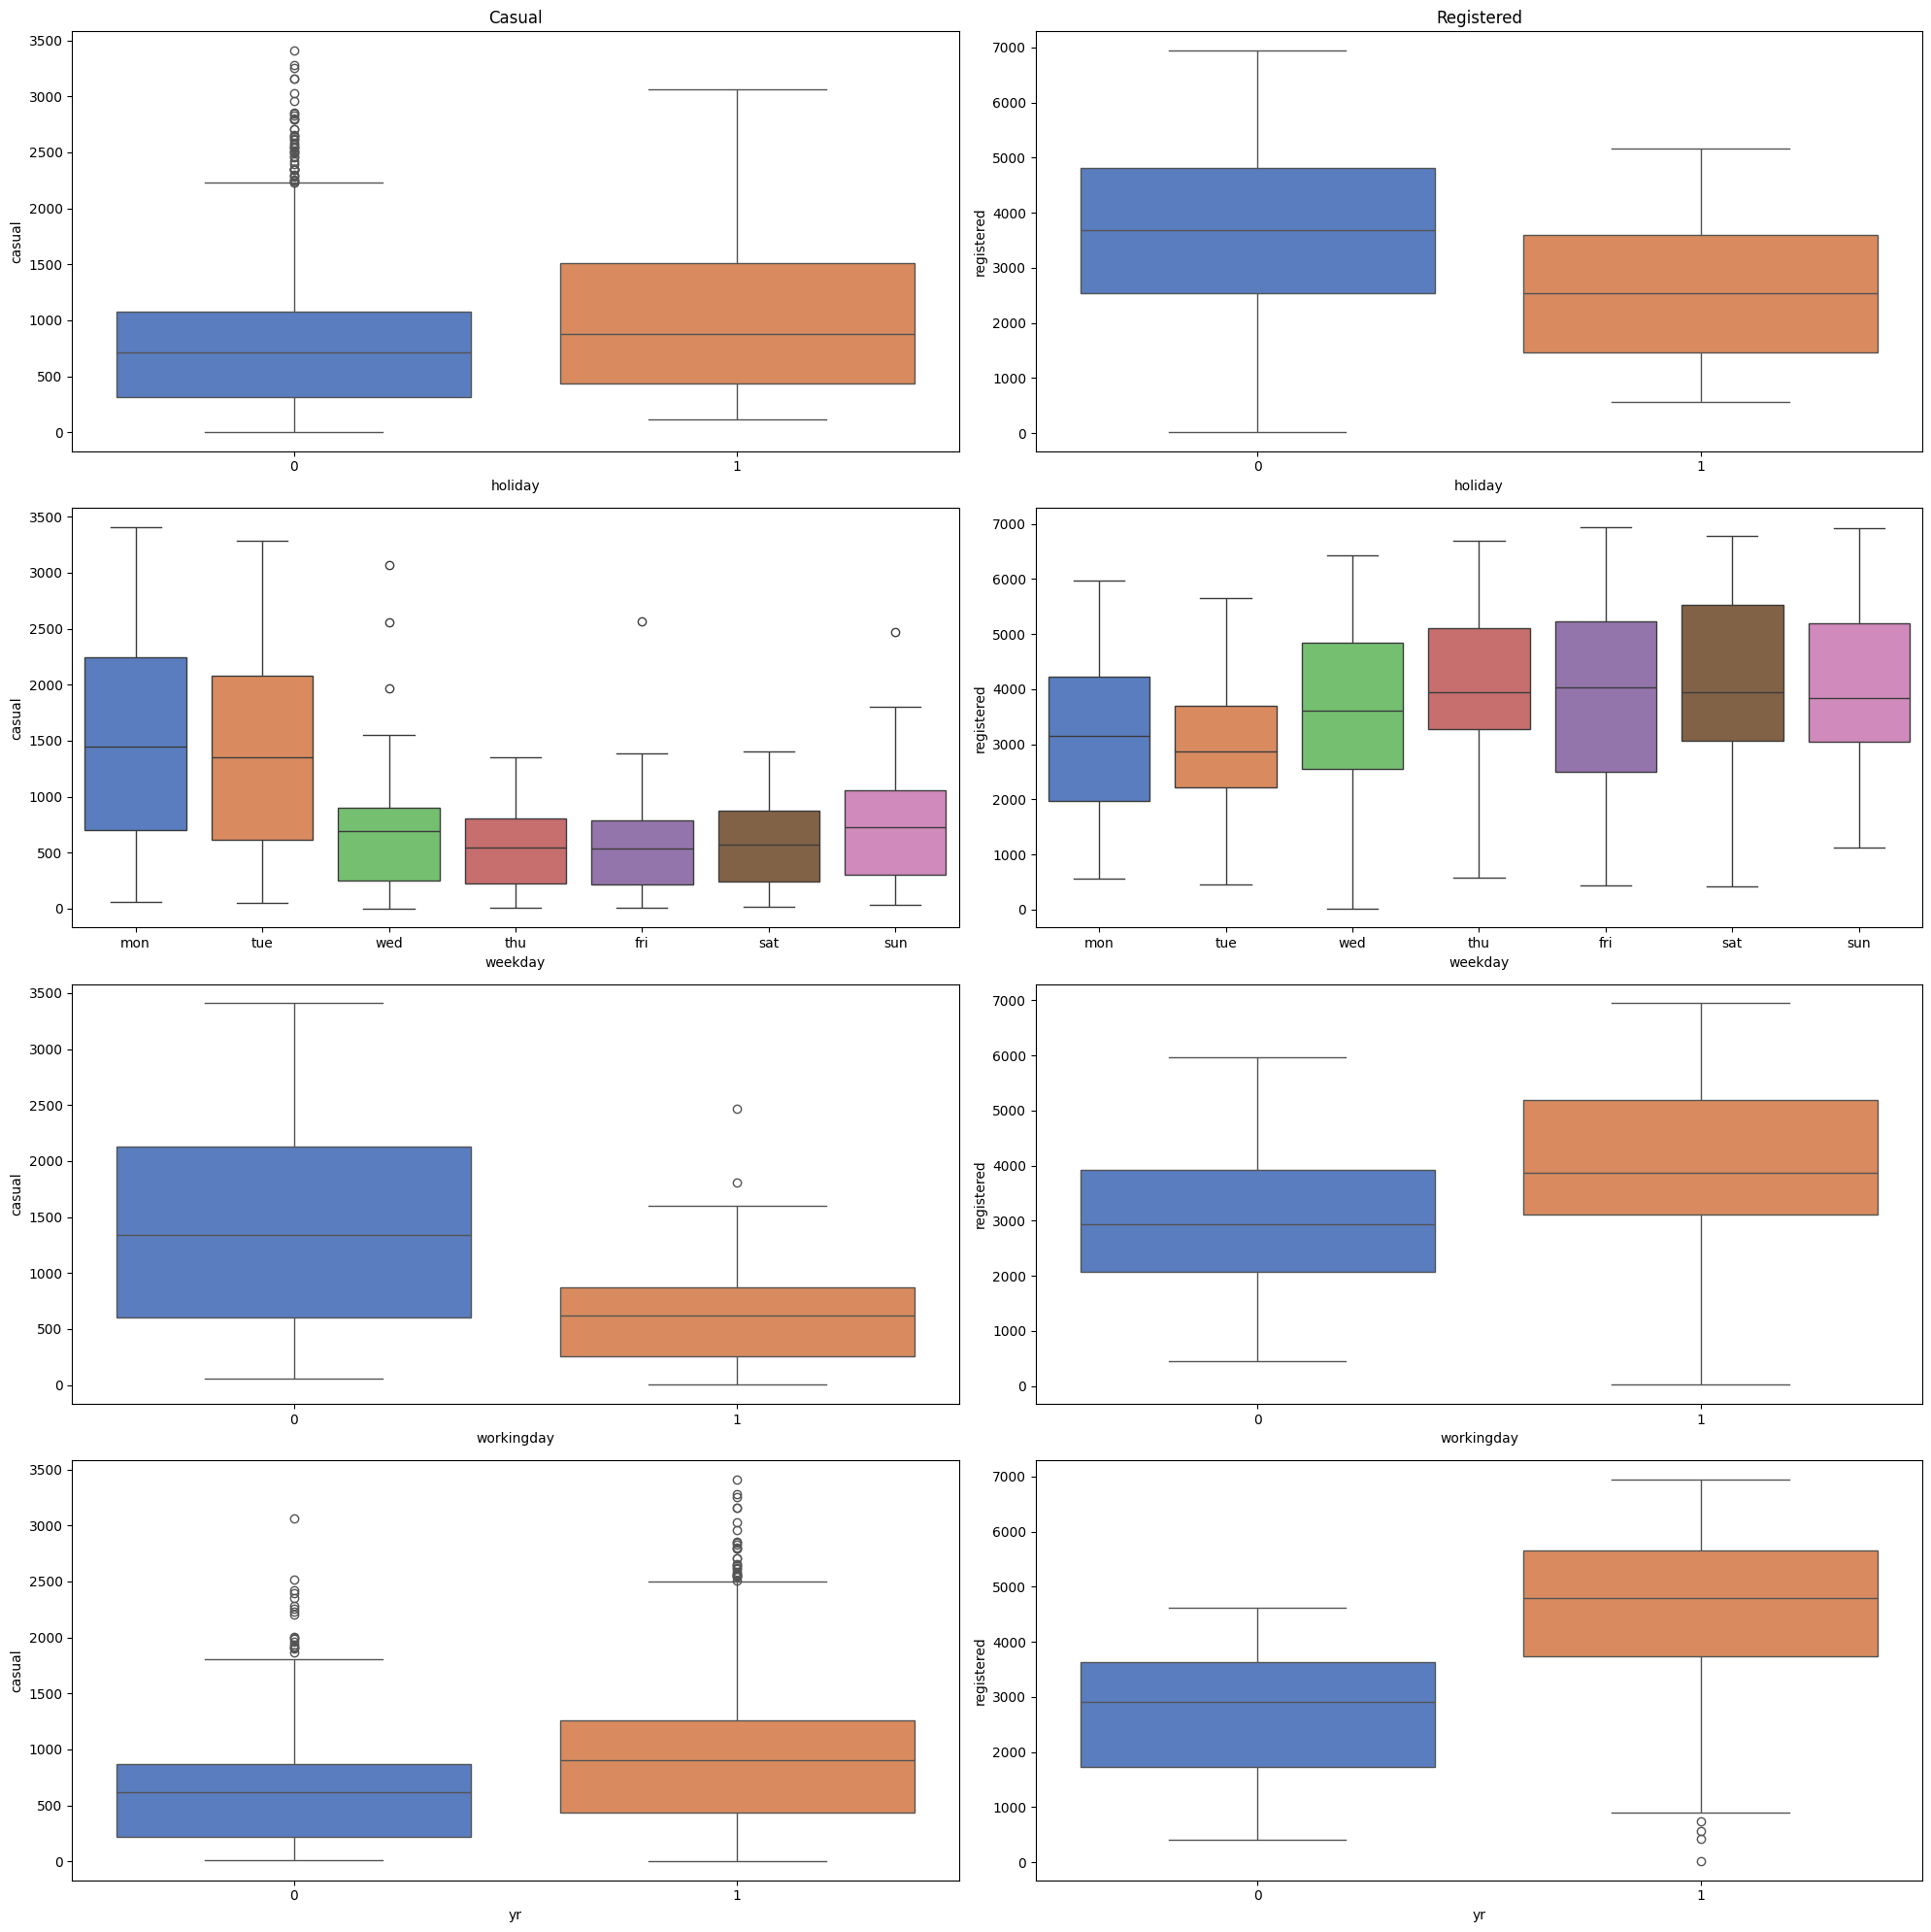

In [17]:
# Creating a box plot with count and each categorical variable 
# As per below graph we can see that casuals rider tends to ride on weekend or holidays more
# While on the other hand Reigstered ride it more on work days
# Our most of the consumers are Registered customers and they use it for work purpose 
# Bike riders were less in number on year 2018 but they increased in 2019
cp=sns.color_palette("muted")  
cat_col=['holiday','weekday','workingday','yr']
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()
for i,col in enumerate(cat_col):
    #plt.figure(figsize=(5,5))
    sns.boxplot(x=col,y='casual',ax=axes[2*i],data=df,palette=cp)
    sns.boxplot(x=col,y='registered',ax=axes[2*i+1],data=df,palette=cp)
axes[0].set_title('Casual')
axes[1].set_title('Registered')
plt.tight_layout()
plt.show()

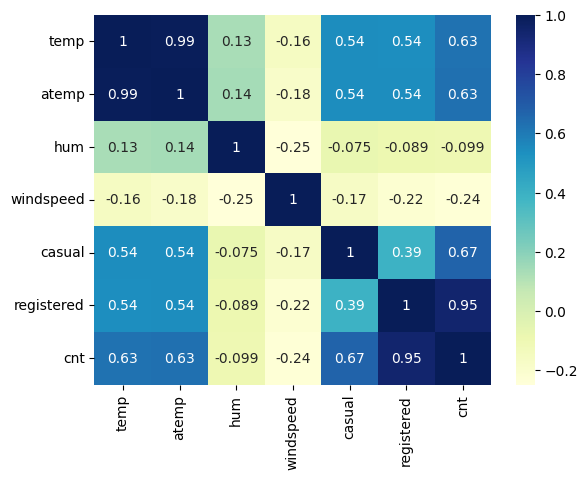

In [18]:

# As per above and below graph we can say that there is a correlation between
# cnt and registered 95%
# cnt and casual 67%
# cnt and temp 63 %
sns.heatmap(df[ms_col].corr(), cmap="YlGnBu", annot = True)
plt.show()

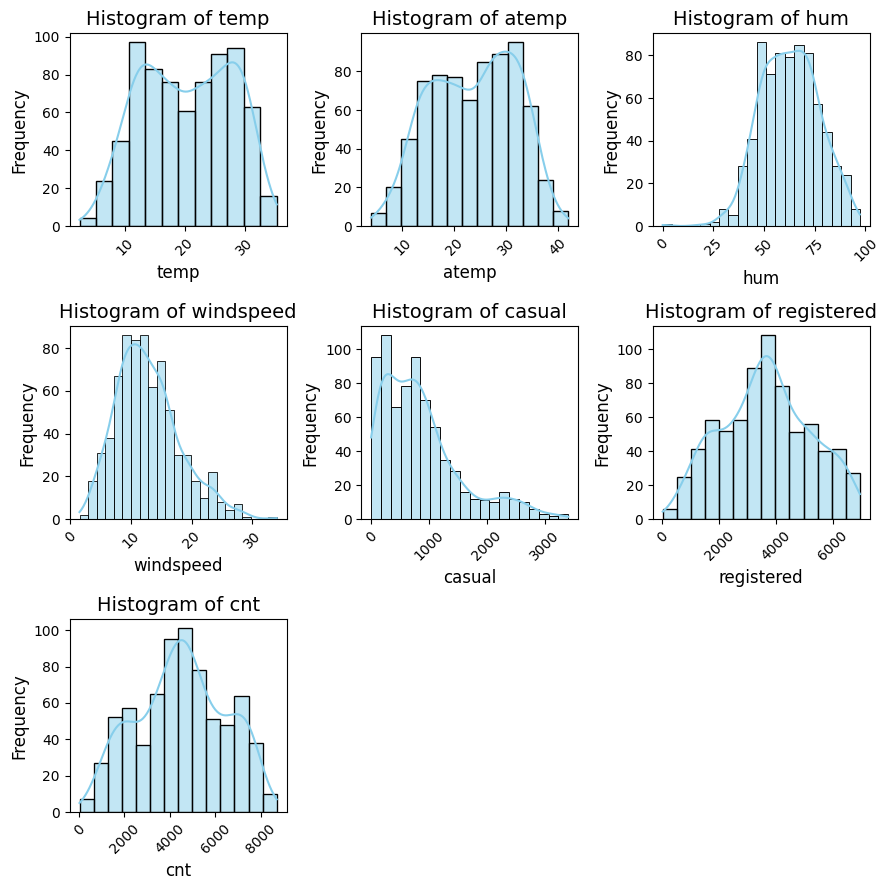

In [19]:

# Below Histogram shows that the registered bikers use the services more than casual
# Most of the services are used between 5 to 15 windspeed 
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()

# Generate histograms for each column in measure_col
for i, col in enumerate(ms_col):
    sns.histplot(data=df[ms_col], x=col, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
if len(ms_col) < len(axes):
    for j in range(len(ms_col), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Data Preperation

In [20]:
df.sample()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
384,385,2019-01-20,spring,1,jan,0,sun,1,Cloudy,8.9175,11.0479,45.0,13.58425,115,3048,3163


## Step 
- Creating dummy variables

In [21]:
# Create Dummy Variables
ses=pd.get_dummies(df['season'],dtype=int,drop_first=True)
mth=pd.get_dummies(df['mnth'],dtype=int,drop_first=True)
wkd=pd.get_dummies(df['weekday'],dtype=int,drop_first=True)
wth=pd.get_dummies(df['weathersit'],dtype=int,drop_first=True)

In [22]:
# Add newly created dummy variables to data frame
df2=pd.concat([df,ses],axis=1) 
df2=pd.concat([df2,mth],axis=1) 
df2=pd.concat([df2,wkd],axis=1) 
df2=pd.concat([df2,wth],axis=1) 

In [23]:
# Remove the unecessary columns from which we have derived dummy variables 
# Removing casual and registered as well because we have sum column cnt
# Removing instant and dteday as well because these are just like sequence and are not dependant 
df2=df2.drop(columns=['season','mnth','weekday','weathersit','casual', 'registered','instant','dteday'])

In [24]:
df2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Cloudy,Snowy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df2.shape

(730, 30)

## Train-Test Split

In [26]:
df_train,df_test=train_test_split(df2,train_size=0.7,random_state=123)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Scaling

In [27]:
# Scaling the variable by using Min Max scalar technique
scaler=MinMaxScaler()

# Considering only those variables where we wanted to scale
measure_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# fit on data
df_train[measure_cols]=scaler.fit_transform(df_train[measure_cols])

In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Cloudy,Snowy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.523529,0.037255,0.684314,0.529460,0.515006,0.633559,0.322878,0.524660,0.272549,0.256863,...,0.082353,0.070588,0.149020,0.147059,0.133333,0.147059,0.129412,0.149020,0.311765,0.033333
std,0.499936,0.189572,0.465245,0.227446,0.218245,0.146766,0.165125,0.235050,0.445708,0.437332,...,0.275172,0.256387,0.356457,0.354512,0.340268,0.354512,0.335985,0.356457,0.463669,0.179682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.330249,0.327562,0.520835,0.203190,0.357055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529616,0.526928,0.632177,0.304134,0.534279,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.719639,0.692343,0.736825,0.411435,0.713670,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Deivinding the data into two sets for model building
y_train=df_train.pop('cnt')
X_train=df_train


## Feature Selection by using RFE

In [30]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(estimator=lm,n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 6),
 ('march', True, 1),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 4),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 9),
 ('sun', False, 7),
 ('thu', False, 8),
 ('tue', True, 1),
 ('wed', True, 1),
 ('Cloudy', True, 1),
 ('Snowy', True, 1)]

In [32]:
# By using RFE we got the 20 columns which we can analyse manually 
fin_col=X_train.columns[rfe.support_]
fin_col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'dec', 'jul', 'march', 'may', 'nov', 'sep', 'mon',
       'tue', 'wed', 'Cloudy', 'Snowy'],
      dtype='object')

# Building model using statsmodel

In [33]:
# Building model from the columns which are provided by RFE method
X_train_rfe=X_train[fin_col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()

In [34]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          9.69e-194
Time:                        20:35:12   Log-Likelihood:                 513.19
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     490   BIC:                            -901.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2652      0.026     10.034      0.000       0.213       0.317
yr             0.2341      0.008     28.507      0.000       0.218       0.250
holiday        0.0361      0.020      1.843      0.066      -0.002       0.075
workingday     0.0886      0.009      9.954      0.000       0.071       0.106
temp           0.3281      0.129      2.534      0.012       0.074       0.582
atemp          0.1489      0.133      1.120      0.263      -0.112       0.410
hum           -0.1630      0.039     -4.196      0.000      -0.239      -0.087
windspeed     -0.1574      0.027     -5.753      0.000      -0.211      -0.104
spring        -0.1250      0.015     -8.149      0.000      -0.155      -0.095
winter         0.0953      0.015      6.510      0.000       0.067       0.124
dec           -0.0572      0.016     -3.549      0.000      -0.089      -0.026
jul           -0.0477      0.018     -2.725      0.007      -0.082      -0.013
march          0.0451      0.015      3.001      0.003       0.016       0.075
may            0.0282      0.015      1.823      0.069      -0.002       0.059
nov           -0.0716      0.020     -3.629      0.000      -0.110      -0.033
sep            0.0592      0.017      3.528      0.000       0.026       0.092
mon            0.1022      0.012      8.717      0.000       0.079       0.125
tue            0.0383      0.012      3.103      0.002       0.014       0.063
wed           -0.0277      0.012     -2.240      0.026      -0.052      -0.003
Cloudy        -0.0487      0.011     -4.511      0.000      -0.070      -0.027
Snowy         -0.2102      0.026     -7.981      0.000      -0.262      -0.158
==============================================================================
Omnibus:                       83.080   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.826
Skew:                          -0.830   Prob(JB):                     2.02e-45
Kurtosis:                       5.632   Cond. No.                     9.94e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
# As per the above summary P value for atemp appear as greater than 0.05 lets eliminate it and retry 
X_train_new=X_train_rfe.drop(columns='atemp')
X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.39e-194
Time:                        20:35:12   Log-Likelihood:                 512.54
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     491   BIC:                            -906.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2670      0.026     10.122      0.000       0.215       0.319
yr             0.2339      0.008     28.488      0.000       0.218       0.250
holiday        0.0355      0.020      1.814      0.070      -0.003       0.074
workingday     0.0893      0.009     10.048      0.000       0.072       0.107
temp           0.4686      0.032     14.662      0.000       0.406       0.531
hum           -0.1614      0.039     -4.156      0.000      -0.238      -0.085
windspeed     -0.1631      0.027     -6.066      0.000      -0.216      -0.110
spring        -0.1251      0.015     -8.154      0.000      -0.155      -0.095
winter         0.0969      0.015      6.649      0.000       0.068       0.125
dec           -0.0573      0.016     -3.550      0.000      -0.089      -0.026
jul           -0.0474      0.018     -2.703      0.007      -0.082      -0.013
march          0.0462      0.015      3.073      0.002       0.017       0.076
may            0.0295      0.015      1.912      0.056      -0.001       0.060
nov           -0.0721      0.020     -3.652      0.000      -0.111      -0.033
sep            0.0593      0.017      3.536      0.000       0.026       0.092
mon            0.1030      0.012      8.799      0.000       0.080       0.126
tue            0.0393      0.012      3.188      0.002       0.015       0.063
wed           -0.0268      0.012     -2.172      0.030      -0.051      -0.003
Cloudy        -0.0487      0.011     -4.513      0.000      -0.070      -0.028
Snowy         -0.2109      0.026     -8.006      0.000      -0.263      -0.159
==============================================================================
Omnibus:                       82.525   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.005
Skew:                          -0.826   Prob(JB):                     5.02e-45
Kurtosis:                       5.621   Cond. No.                     9.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
# Removing holiday and checking the impact
X_train_new=X_train_new.drop(columns='holiday')
X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.39e-194
Time:                        20:35:12   Log-Likelihood:                 512.54
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     491   BIC:                            -906.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3025      0.040      7.605      0.000       0.224       0.381
yr             0.2339      0.008     28.488      0.000       0.218       0.250
workingday     0.0538      0.023      2.382      0.018       0.009       0.098
temp           0.4686      0.032     14.662      0.000       0.406       0.531
hum           -0.1614      0.039     -4.156      0.000      -0.238      -0.085
windspeed     -0.1631      0.027     -6.066      0.000      -0.216      -0.110
spring        -0.1251      0.015     -8.154      0.000      -0.155      -0.095
winter         0.0969      0.015      6.649      0.000       0.068       0.125
dec           -0.0573      0.016     -3.550      0.000      -0.089      -0.026
jul           -0.0474      0.018     -2.703      0.007      -0.082      -0.013
march          0.0462      0.015      3.073      0.002       0.017       0.076
may            0.0295      0.015      1.912      0.056      -0.001       0.060
nov           -0.0721      0.020     -3.652      0.000      -0.111      -0.033
sep            0.0593      0.017      3.536      0.000       0.026       0.092
mon            0.0675      0.025      2.692      0.007       0.018       0.117
tue            0.0037      0.025      0.148      0.883      -0.046       0.054
wed           -0.0268      0.012     -2.172      0.030      -0.051      -0.003
Cloudy        -0.0487      0.011     -4.513      0.000      -0.070      -0.028
Snowy         -0.2109      0.026     -8.006      0.000      -0.263      -0.159
==============================================================================
Omnibus:                       82.525   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.005
Skew:                          -0.826   Prob(JB):                     5.02e-45
Kurtosis:                       5.621   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Removing tue because its p value is high
X_train_new=X_train_new.drop(columns=['tue'])
X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.05e-195
Time:                        20:35:12   Log-Likelihood:                 512.53
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     492   BIC:                            -912.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3056      0.034      9.018      0.000       0.239       0.372
yr             0.2340      0.008     28.530      0.000       0.218       0.250
workingday     0.0508      0.011      4.596      0.000       0.029       0.073
temp           0.4684      0.032     14.681      0.000       0.406       0.531
hum           -0.1612      0.039     -4.158      0.000      -0.237      -0.085
windspeed     -0.1631      0.027     -6.073      0.000      -0.216      -0.110
spring        -0.1252      0.015     -8.175      0.000      -0.155      -0.095
winter         0.0969      0.015      6.661      0.000       0.068       0.126
dec           -0.0574      0.016     -3.563      0.000      -0.089      -0.026
jul           -0.0473      0.018     -2.705      0.007      -0.082      -0.013
march          0.0462      0.015      3.082      0.002       0.017       0.076
may            0.0295      0.015      1.912      0.056      -0.001       0.060
nov           -0.0724      0.020     -3.687      0.000      -0.111      -0.034
sep            0.0592      0.017      3.537      0.000       0.026       0.092
mon            0.0644      0.014      4.447      0.000       0.036       0.093
wed           -0.0274      0.011     -2.392      0.017      -0.050      -0.005
Cloudy        -0.0488      0.011     -4.531      0.000      -0.070      -0.028
Snowy         -0.2110      0.026     -8.018      0.000      -0.263      -0.159
==============================================================================
Omnibus:                       82.734   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.580
Skew:                          -0.828   Prob(JB):                     3.77e-45
Kurtosis:                       5.624   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# After checking that found at may also has high p value
X_train_new=X_train_new.drop(columns=['may'])
X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          4.65e-196
Time:                        20:35:12   Log-Likelihood:                 510.64
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     493   BIC:                            -915.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3060      0.034      9.005      0.000       0.239       0.373
yr             0.2351      0.008     28.653      0.000       0.219       0.251
workingday     0.0503      0.011      4.534      0.000       0.028       0.072
temp           0.4672      0.032     14.608      0.000       0.404       0.530
hum           -0.1485      0.038     -3.876      0.000      -0.224      -0.073
windspeed     -0.1628      0.027     -6.045      0.000      -0.216      -0.110
spring        -0.1319      0.015     -8.811      0.000      -0.161      -0.102
winter         0.0899      0.014      6.368      0.000       0.062       0.118
dec           -0.0589      0.016     -3.649      0.000      -0.091      -0.027
jul           -0.0547      0.017     -3.193      0.001      -0.088      -0.021
march          0.0436      0.015      2.914      0.004       0.014       0.073
nov           -0.0732      0.020     -3.720      0.000      -0.112      -0.035
sep            0.0528      0.016      3.211      0.001       0.020       0.085
mon            0.0644      0.015      4.432      0.000       0.036       0.093
wed           -0.0272      0.012     -2.362      0.019      -0.050      -0.005
Cloudy        -0.0499      0.011     -4.629      0.000      -0.071      -0.029
Snowy         -0.2150      0.026     -8.177      0.000      -0.267      -0.163
==============================================================================
Omnibus:                       81.902   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.640
Skew:                          -0.832   Prob(JB):                     3.29e-43
Kurtosis:                       5.538   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using VIF for checking multicollinearity  

In [39]:
# Since all the variable has good p value score 

X_train_new=X_train_new.drop(['const'],axis=1)


In [40]:
vif=pd.DataFrame()
X = X_train_new
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
3,hum,23.22
2,temp,16.24
1,workingday,4.74
4,windspeed,4.42
5,spring,2.87
6,winter,2.71
0,yr,2.15
14,Cloudy,2.12
12,mon,1.86
10,nov,1.66


In [41]:
# As per above humidity and temp has high VIF > 10 dropping them

X_train_new=X_train_new.drop(['hum','temp'],axis=1)

In [42]:
# Running the model again
X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     136.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          7.77e-160
Time:                        20:35:13   Log-Likelihood:                 418.73
No. Observations:                 510   AIC:                            -807.5
Df Residuals:                     495   BIC:                            -743.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5265      0.018     29.114      0.000       0.491       0.562
yr             0.2517      0.010     26.063      0.000       0.233       0.271
workingday     0.0529      0.013      3.999      0.000       0.027       0.079
windspeed     -0.1800      0.030     -5.902      0.000      -0.240      -0.120
spring        -0.2832      0.013    -22.494      0.000      -0.308      -0.258
winter         0.0185      0.016      1.171      0.242      -0.013       0.050
dec           -0.1121      0.019     -5.976      0.000      -0.149      -0.075
jul            0.0383      0.019      2.015      0.044       0.001       0.076
march          0.0434      0.018      2.428      0.016       0.008       0.078
nov           -0.1340      0.023     -5.842      0.000      -0.179      -0.089
sep            0.0767      0.019      3.941      0.000       0.038       0.115
mon            0.0606      0.017      3.492      0.001       0.026       0.095
wed           -0.0312      0.014     -2.274      0.023      -0.058      -0.004
Cloudy        -0.0847      0.011     -8.023      0.000      -0.105      -0.064
Snowy         -0.2723      0.028     -9.780      0.000      -0.327      -0.218
==============================================================================
Omnibus:                       40.014   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.805
Skew:                          -0.530   Prob(JB):                     3.11e-15
Kurtosis:                       4.421   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Removing winter since it has high P 
X_train_new=X_train_new.drop(columns=['winter'])
X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.24e-160
Time:                        20:35:13   Log-Likelihood:                 418.02
No. Observations:                 510   AIC:                            -808.0
Df Residuals:                     496   BIC:                            -748.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5317      0.018     30.286      0.000       0.497       0.566
yr             0.2520      0.010     26.081      0.000       0.233       0.271
workingday     0.0525      0.013      3.971      0.000       0.027       0.078
windspeed     -0.1838      0.030     -6.061      0.000      -0.243      -0.124
spring        -0.2882      0.012    -24.307      0.000      -0.311      -0.265
dec           -0.1027      0.017     -6.050      0.000      -0.136      -0.069
jul            0.0340      0.019      1.823      0.069      -0.003       0.071
march          0.0428      0.018      2.395      0.017       0.008       0.078
nov           -0.1199      0.020     -6.143      0.000      -0.158      -0.082
sep            0.0775      0.019      3.985      0.000       0.039       0.116
mon            0.0603      0.017      3.478      0.001       0.026       0.094
wed           -0.0306      0.014     -2.231      0.026      -0.058      -0.004
Cloudy        -0.0841      0.011     -7.970      0.000      -0.105      -0.063
Snowy         -0.2683      0.028     -9.707      0.000      -0.323      -0.214
==============================================================================
Omnibus:                       39.163   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.842
Skew:                          -0.529   Prob(JB):                     1.37e-14
Kurtosis:                       4.373   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
X_train_new=X_train_new.drop(columns=['jul'])
X_train_new=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          5.01e-161
Time:                        20:35:13   Log-Likelihood:                 416.32
No. Observations:                 510   AIC:                            -806.6
Df Residuals:                     497   BIC:                            -751.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5388      0.017     31.412      0.000       0.505       0.572
yr             0.2522      0.010     26.046      0.000       0.233       0.271
workingday     0.0518      0.013      3.907      0.000       0.026       0.078
windspeed     -0.1885      0.030     -6.223      0.000      -0.248      -0.129
spring        -0.2920      0.012    -24.949      0.000      -0.315      -0.269
dec           -0.1064      0.017     -6.295      0.000      -0.140      -0.073
march          0.0407      0.018      2.276      0.023       0.006       0.076
nov           -0.1251      0.019     -6.464      0.000      -0.163      -0.087
sep            0.0725      0.019      3.756      0.000       0.035       0.110
mon            0.0604      0.017      3.470      0.001       0.026       0.095
wed           -0.0297      0.014     -2.165      0.031      -0.057      -0.003
Cloudy        -0.0854      0.011     -8.101      0.000      -0.106      -0.065
Snowy         -0.2679      0.028     -9.668      0.000      -0.322      -0.213
==============================================================================
Omnibus:                       39.996   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.233
Skew:                          -0.528   Prob(JB):                     2.52e-15
Kurtosis:                       4.432   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_train_new=X_train_new.drop(['const'],axis=1)
vif=pd.DataFrame()
X = X_train_new
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,windspeed,3.58
1,workingday,3.20
0,yr,1.90
3,spring,1.61
8,mon,1.55
10,Cloudy,1.46
5,march,1.22
9,wed,1.20
4,dec,1.13
7,sep,1.12


# Residual Analysis of the train data 

In [46]:
X_train_final=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_final).fit()


In [47]:
y_train_cnt=lm.predict(X_train_final)

Text(0.5, 0, 'Errors')

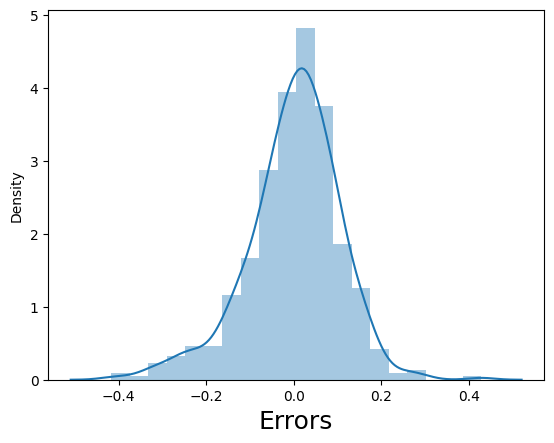

In [48]:
# Plotting histogram for error terms 
# Below Graph shows that it is centered around zero 
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel("Errors",fontsize=18)

# Making Predictions 

In [49]:
# Scaling the variable by using Min Max scalar technique
scaler=MinMaxScaler()

# Considering only those variables where we wanted to scale
measure_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# fit on data on test 
df_test[measure_cols]=scaler.fit_transform(df_test[measure_cols])

In [50]:
y_test=df_test.pop('cnt')
X_test=df_test


In [51]:
X_test_new=X_test[X_train_final.drop(columns='const').columns]

X_test_new=sm.add_constant(X_test_new)

In [52]:
# Lets predict it on our test data 
y_pred=lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

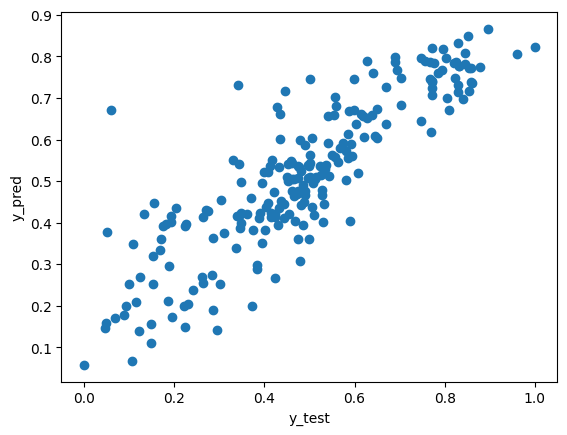

In [53]:
# Plotting y_test and y_pred to check the spread
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=10)
plt.ylabel('y_pred',fontsize=10)